In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 


In [3]:
#read file
data=pd.read_csv("../Data_mining/data/dataset_mood_smartphone.csv")
data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
5,6,AS14.01,2014-02-27 12:00:00.000,mood,6.000
6,7,AS14.01,2014-02-27 15:00:00.000,mood,7.000
7,8,AS14.01,2014-03-21 09:00:00.000,mood,6.000
8,9,AS14.01,2014-03-21 11:00:00.000,mood,6.000
9,10,AS14.01,2014-03-21 15:00:00.000,mood,7.000


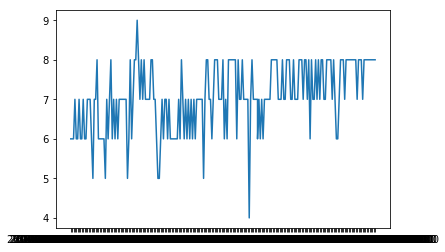

In [3]:
as14= data.loc[(data["variable"]=="mood") & (data["id"]=="AS14.01")]
as14= as14.values
plt.plot(as14[:, 2], as14[:, 4])
plt.show()

In [ ]:
as14_m= data.loc[(data["variable"]=="mood") & (data["id"]=="AS14.01")]
as14_e= data.loc[(data["variable"]=="circumplex.arousal") & (data["id"]=="AS14.01")]
as14_m= as14_m.values
as14_e = as14_e.values
plt.plot(as14_m[:, 4], as14_e[:-1, 4])
plt.show()

### Preprocessing

In [5]:
#dict_variable is a dictionary with key the tuple (Id,variable) and value a dictionary with key the date and value a list 
#of values of the user for that day
dict_variable={}
previous_day="-"
for index, row in data.iterrows():
    #check if the row is the first one
    if index==0:
        dict_variable[(row["id"],row["variable"])]={}
        previous_day=row["time"].split(" ")[0].split("-")[1:]
        dict_variable[(row["id"],row["variable"])]["-".join(previous_day)]=list()
        dict_variable[(row["id"],row["variable"])]["-".join(previous_day)].append(row["value"])
    else:
        #check if you are still in the same day (different hour)
        current_day=row["time"].split(" ")[0].split("-")[1:]
        #print(current_day)
        if current_day!=previous_day or data.iloc[index-1,1]!=row["id"]:
            #you are in a new day
            if (row["id"],row["variable"]) not in dict_variable: dict_variable.update({(row["id"],row["variable"]):{}})
            dict_variable[(row["id"],row["variable"])]["-".join(current_day)]=list()
            dict_variable[(row["id"],row["variable"])]["-".join(current_day)].append(row["value"])
            #update the previous day
            previous_day=current_day
        elif current_day==previous_day:
            #you are in the same day
            if (row["id"],row["variable"]) not in dict_variable: dict_variable.update({(row["id"],row["variable"]):{}})
            dict_variable[(row["id"],row["variable"])]["-".join(current_day)].append(row["value"])
            previous_day=current_day
            

        

In [8]:
dict_variable[('AS14.01', 'mood')]

{'02-26': [6.0, 6.0, 6.0, 7.0],
 '02-27': [6.0, 6.0, 7.0],
 '03-21': [6.0, 6.0, 7.0, 6.0, 6.0],
 '03-22': [7.0, 7.0, 7.0, 6.0, 5.0],
 '03-23': [7.0, 7.0, 8.0, 6.0, 6.0],
 '03-24': [6.0, 6.0, 6.0, 5.0, 7.0],
 '03-25': [6.0, 7.0, 8.0, 6.0],
 '03-26': [7.0, 6.0, 7.0, 6.0, 7.0],
 '03-27': [7.0, 7.0, 7.0, 7.0, 7.0],
 '03-28': [5.0, 6.0, 8.0, 6.0, 7.0],
 '03-29': [8.0, 8.0, 9.0, 8.0, 7.0],
 '03-30': [8.0, 7.0, 8.0, 7.0],
 '03-31': [7.0, 7.0, 7.0, 8.0, 8.0],
 '04-01': [7.0, 7.0, 6.0, 5.0, 5.0],
 '04-02': [6.0, 7.0, 6.0, 7.0],
 '04-03': [7.0, 6.0, 7.0, 6.0, 6.0],
 '04-04': [6.0, 6.0, 6.0, 6.0, 7.0],
 '04-05': [6.0, 8.0, 7.0, 6.0, 7.0],
 '04-06': [6.0, 7.0, 6.0, 7.0],
 '04-07': [6.0, 7.0, 6.0, 7.0],
 '04-08': [7.0, 7.0, 7.0, 7.0, 5.0],
 '04-09': [7.0, 8.0, 8.0, 7.0, 7.0],
 '04-10': [6.0, 7.0, 8.0, 8.0, 8.0],
 '04-11': [7.0, 7.0, 7.0, 8.0, 6.0],
 '04-12': [7.0, 6.0, 8.0, 8.0],
 '04-13': [8.0, 8.0, 8.0, 8.0],
 '04-14': [6.0, 8.0, 7.0, 7.0, 8.0],
 '04-15': [7.0, 7.0, 7.0, 7.0, 4.0],
 '04-16': [7.0

In [38]:
variables_list=["mood","circumplex.arousal","circumplex.valence","activity","screen","call","sms","appCat.builtin","appCat.communication","appCat.entertainment","appCat.finance","appCat.game","appCat.office","appCat.other","appCat.social","appCat.other","appCat.travel","appCat.unknown","appCat.utilities","appCat.weather"]
#the days in the same month are considered as "Period"
#matrix (list of list) to store the new preprocessed data
new_matrix=[[]]
index=0
#list to store values from different dates but same month
for i,var in dict_variable:
    previous_month=0
    for key in dict_variable[(i,var)]:
        #calculate the mean values of each variable for each day
        mean=statistics.mean(dict_variable[(i,var)][key])
        if previous_month=0:
            new_matrix[index].append(i)
            previous_month=key.split(-)[0]
            temp_list=[]
        elif key.split(-)[0] == previous_month:
            temp_list.append()
            
            
            
    break #this is only to test with the first element of the dictionary
    

6.25


AttributeError: 'str' object has no attribute 'to_string'

In [52]:
a=[[]]
a[0].append(3)